# Proyecto final de Machine Learning para Astronomía

### Nombres:
- Justine Haefele Garrido
- Joseph Dabre Valenzuela
- Javiera Martinez Rojas

El Centro Nacional de Información Sísmica de Estados Unidos (NEIC) determina la ubicación y la magnitud de todos los terremotos importantes que se producen en todo el mundo y difunde esta información a organismos internacionales, científicos y al público en general. De esta manera, proporciona una amplia base de datos sísmicos.

Este dataset incluye un registro de la fecha, la hora, la ubicación, la profundidad, la magnitud y el origen de todos los terremotos con una magnitud igual o superior a 5.5 registrados desde 1965 hasta 2016. Consta de 21 columnas, con un total de 23412 datos.

<u> Comenzamos importando los paquetes necesarios y los datos desde Kaggle: <u>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from scipy.stats import pearsonr
from matplotlib.cm import get_cmap

In [ ]:
#!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("usgs/earthquake-database")

print("Path to dataset files:", path)

100%|██████████| 590k/590k [00:00<00:00, 711kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/usgs/earthquake-database/versions/1


In [ ]:
# Para ver qué archivos hay en el directorio que descargamos
print(os.listdir(path))

['database.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, 'database.csv'))

Visualizamos la estructura del dataset y sus respectivas columnas:

In [ ]:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# **EDA: Exploratory Data Analysis**

Comenzamos revisando las columnas del dataset y su significado.

In [ ]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

- `Date` : es la fecha del sismo en formato YYYY-MM-DD
- `Time` : es la hora del sismo en formato HH:MM:SS
- `Latitude` y `Longitude` : ubicación geográfica del epicentro
- `Depth`: profundidad del hipocentro
- `Depth Seismic Stations`: es el número de estaciones que contribuyeron a estimar la profundidad
- `Magnitude`: es la medida principal de la energía liberada por el sismo - `Magnitude Type`: indica la escala usada (Richter, momento, etc.)
- `Magnitude Seismic Stations`: es el número de estaciones sísmicas que reportaron o detectaron ese evento y contribuyeron al cálculo de la magnitud.
- `Azimuthal Gap` : mayor ángulo sin cobertura de estaciones
- `Horizontal Distance`: indica la distancia de la localización horizontal del epicentro.
- `RMS`: mide la consistencia de los tiempos de llegada observados frente a los calculados, reflejando la calidad de la localización.
- `ID`: identificador único del evento
- `Type` : indica el tipo de evento, ya sea terremoto, explosión, etc.
- `Source`, `Location Source`, y `Magnitude Source`: muestran las redes u organizaciones que reportaron o calcularon la información
- `Status`: indica si el evento fue detectado automáticamente o revisado manualmente.

In [ ]:
df['Magnitude Seismic Stations'].unique()

array([ nan,   4.,  10.,   0.,   6.,   8.,  13.,   9.,  12.,   2.,   1.,
        32.,  66.,  75.,  71.,  44.,  74.,  55.,  38.,  46.,  25.,   7.,
        80.,  16.,  19.,   5.,  40.,   3.,  15.,  11.,  62.,  14.,  33.,
        49.,  61.,  18.,  23.,  29.,  78.,  53.,  86.,  21.,  72.,  59.,
        85.,  17., 102.,  22.,  28.,  60.,  30.,  73.,  54.,  50.,  82.,
        41.,  47.,  20.,  43.,  34.,  48.,  63.,  24.,  67.,  27.,  99.,
        31.,  51.,  69.,  52.,  90.,  87.,  83.,  26.,  45.,  36.,  93.,
        91.,  39.,  79.,  58.,  76., 106.,  65.,  42.,  96., 114.,  35.,
        68.,  37.,  94.,  98.,  77.,  81.,  84.,  64.,  56.,  70., 113.,
       118.,  97.,  88., 108.,  92.,  57.,  89., 100., 121.,  95., 116.,
       111., 136., 135., 125., 126., 115., 130., 124., 139., 127., 107.,
       128., 123., 131., 112., 122., 134., 104., 110., 129., 168., 156.,
       147., 141., 101., 194., 138., 150., 133., 140., 132., 105., 148.,
       175., 166., 109., 178., 145., 137., 270., 11

In [ ]:
df['Magnitude Type'].value_counts()

,count
Magnitude Type,
MW,7722
MWC,5669
MB,3761
MWB,2458
MWW,1983
MS,1702
ML,77
MWR,26
MD,6


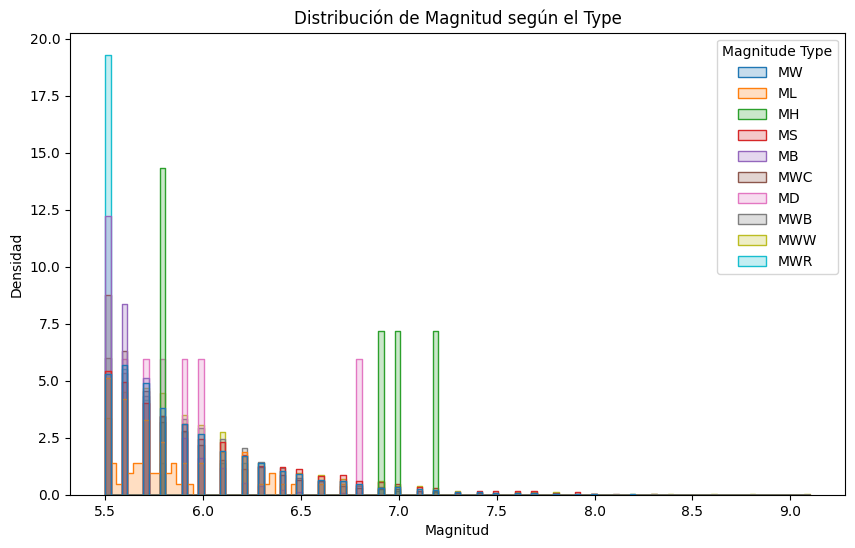

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Magnitude', hue='Magnitude Type', element='step', stat='density', common_norm=False)
plt.title("Distribución de Magnitud según el Type")
plt.xlabel("Magnitud")
plt.ylabel("Densidad")
plt.show()

Existen diferentes escalas para las magnitudes del dataset. Aquí vemos que el tipo de magnitud MH es la más extraña en comparación a los demás datos, seguida de MD y ML. Las otras resultan comparables en valores, ya que provienen de la misma raíz: la magnitud de momento $M_W$.

## <u> Revisemos relaciones entre las variables del dataset: <u>

- Los eventos sísmicos ocurren mayoritariamente cerca de la latitud 0°, es decir cercano al Ecuador terrestre, y levemente hacia el sur.
- También tienen mayor frecuencia en las longitudes extremas (150°, -150°)
- La mayor parte de las estaciones sísmicas se ubican a una profundidad de 300 km.
- Hay más sismos de baja intensidad ($\sim 5.5$) que de alta intensidad.
- Los sismos de alta intensidad suelen producirse en 2 peaks: a muy bajas profundidades (< 100 km), y a altas profundidades ($\sim 600$ km).

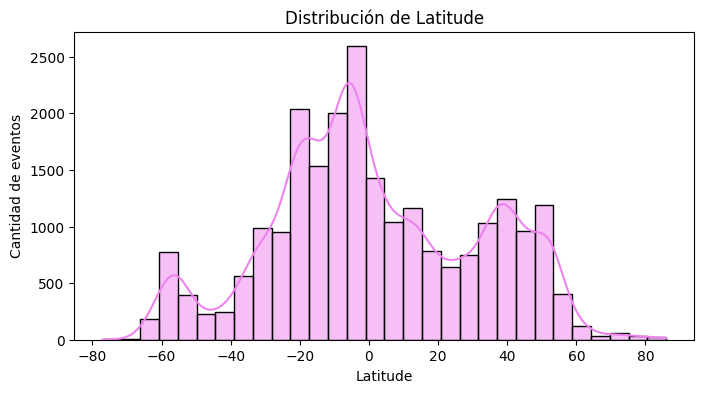

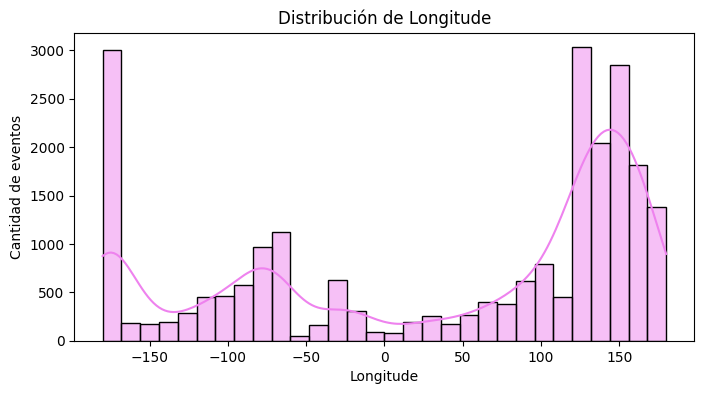

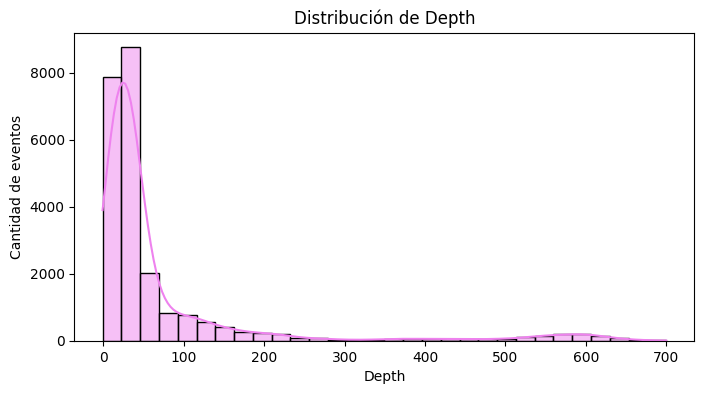

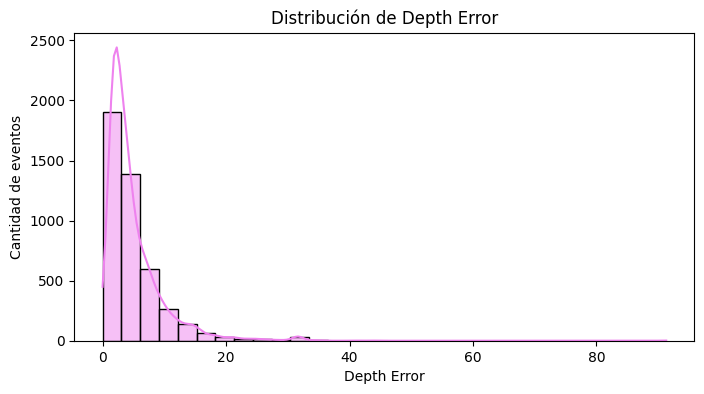

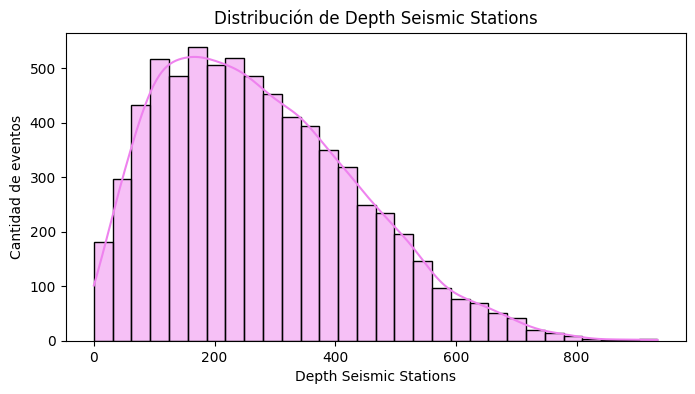

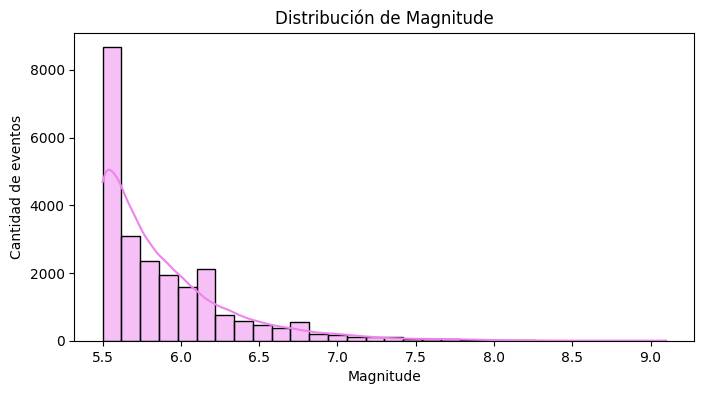

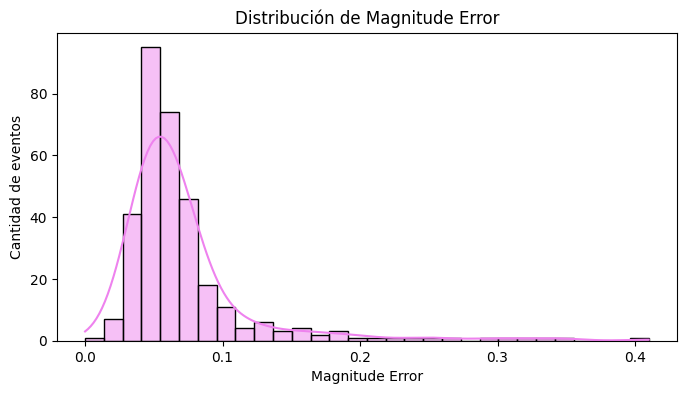

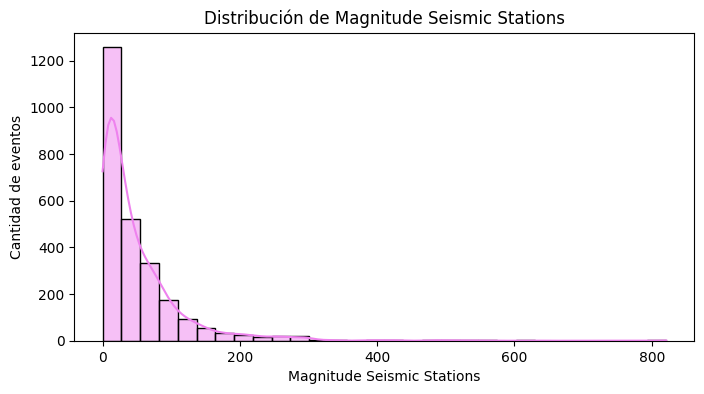

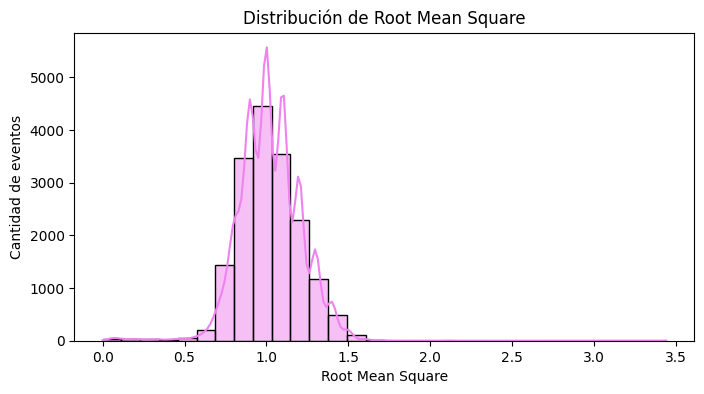

In [ ]:
columns = ['Latitude', 'Longitude', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Root Mean Square']

for col in columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color = 'violet')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de eventos')
    plt.show()



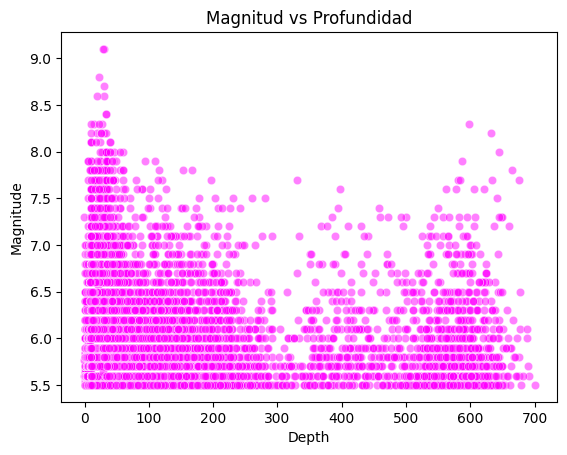

In [ ]:
sns.scatterplot(data=df, x='Depth', y='Magnitude', alpha=0.5, color = 'magenta')
plt.title("Magnitud vs Profundidad")
plt.show()

# Podemos visualizar cómo se distribuyen los sismos en el planeta:

de donde vemos que existe una clara red en la ubicación de los sismos, asociada a la presencia de las placas tectónicas.

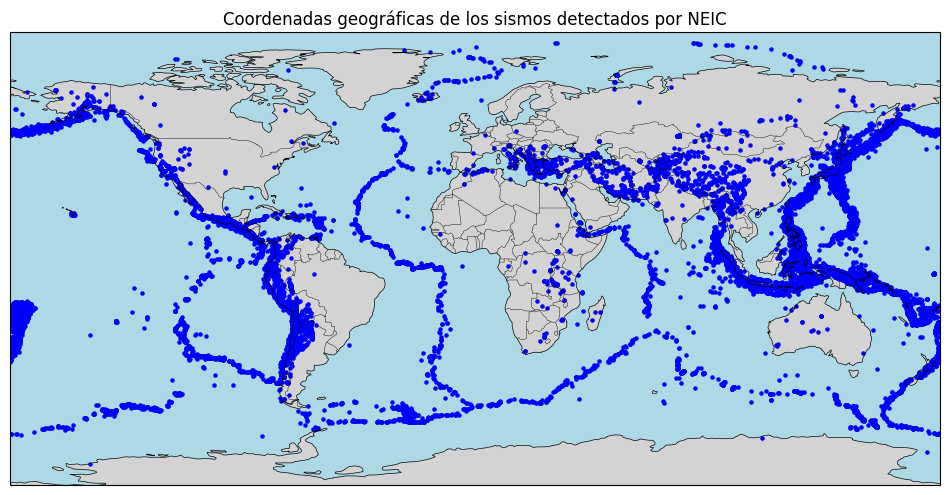

In [ ]:
#!pip install cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(12, 6))

# creamos una proyección del mapa del mundo
ax = plt.axes(projection=ccrs.PlateCarree())

# mapa base que incluye la tierra, el océano y los bordes de los continentes
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)

# puntos de los sismos
ax.scatter(df['Longitude'], df['Latitude'], s=5, color='blue', transform=ccrs.PlateCarree())

plt.title("Coordenadas geográficas de los sismos detectados por NEIC")
plt.show()


In [ ]:
print('Fecha más antigua:',df['Date'].min())
print('Fecha más reciente:',df['Date'].max())


Fecha más antigua: 01/01/1967
Fecha más reciente: 2011-03-13T02:23:34.520Z


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df['Year'] = df['Date'].dt.year

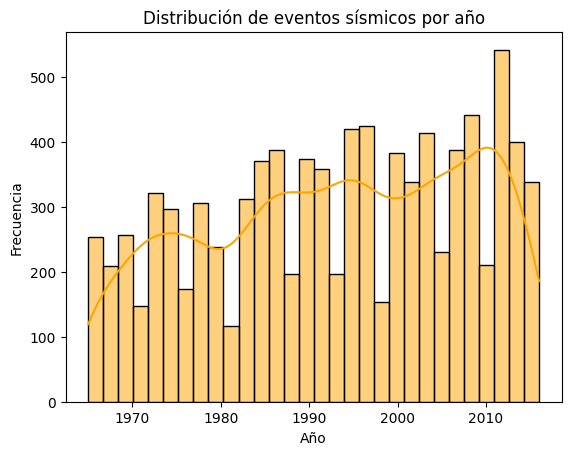

In [ ]:
sns.histplot(df['Year'], bins=30, kde=True, color='orange')
plt.title('Distribución de eventos sísmicos por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

Desde aquí podemos observar que se registraron más eventos sísmicos con el paso de los años, lo cual puede deberse a la progresiva mejora de la instrumentación y centros sismológicos en todo el mundo.

Vemos que hay varios tipos de fenómenos registrados en el dataset:

In [ ]:
df['Type'].value_counts()

,count
Type,
Earthquake,23232
Nuclear Explosion,175
Explosion,4
Rock Burst,1


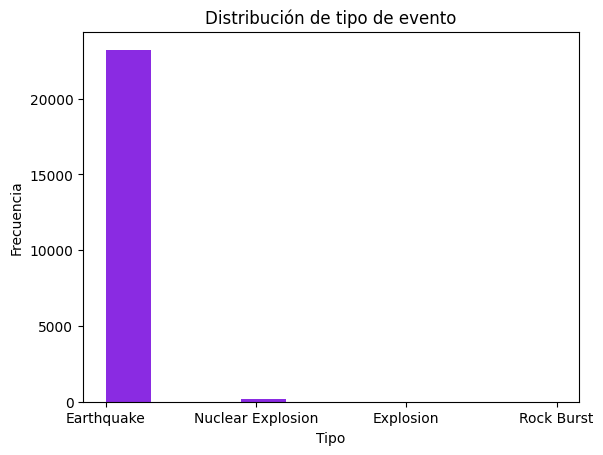

In [ ]:
plt.hist(df['Type'], color='blueviolet')
plt.title('Distribución de tipo de evento')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.show()

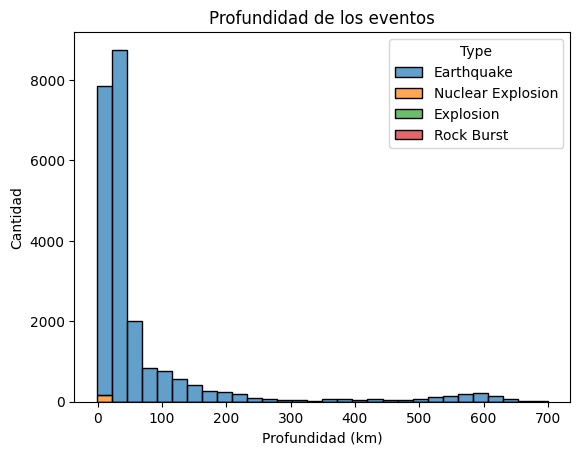

In [ ]:
sns.histplot(data=df, x='Depth', hue='Type', multiple='stack', bins=30, alpha=0.7)

plt.title("Profundidad de los eventos")
plt.xlabel("Profundidad (km)")
plt.ylabel("Cantidad")
plt.show()


Desde aquí se observa que hay 4 posibles clases de eventos sísmicos:
- Terremoto
- Explosión nuclear
- Explosión
- Estallido de roca

Los cuales se distribuyen no homogéneamente. Hay un claro signo de desbalance en los datos, que favorece a los terremotos y explosiones nucleares, mientras que el resto tiende a ser despreciable.

Las explosiones nucleares ocurren a baja profundidad, mientras que los terremotos presentan una distribución más amplia.

### <u>Podemos generar una matriz para ver la correlación entre las características: <u>

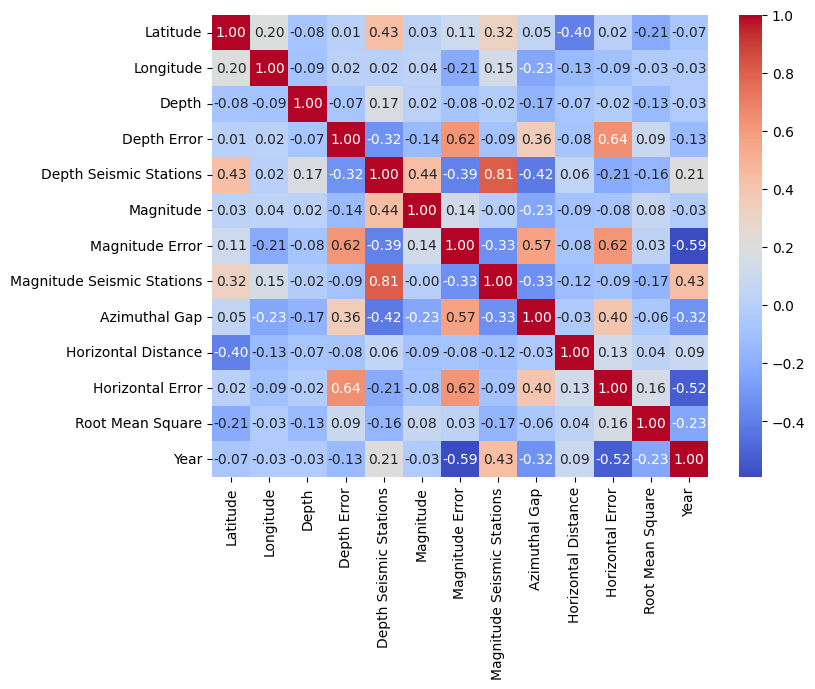

In [ ]:
# Selecciona sólamente las columnas con valores numéricos
df_numerico = df.select_dtypes(include=[np.number])
corr_matrix = df_numerico.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Desde la matriz de correlación vemos que la cantidad de estaciones que reportaron datos para calcular los sismos (Magnitude Seismic  Stations) está correlacionada con la profundidad de las estaciones sísmicas, y que los errores en magnitud, profundidad y horizontal distance están relacionados entre sí.

El resto de las variables no presentan una correlación notable.

### <u> Nuestro objetivo: <u>

**Predecir la magnitud de un sismo a través de algoritmos de regresión**, para lo cual usaremos como features las columnas de longitud y latitud del epicentro, dado que quizás la región geográfica tiene que ver en la aparición de los sismos, la profundidad a la que ocurrieron (en km) y la magnitud de los eventos.

Se utilizará únicamente la escala de magnitud de momento ($M_W$) junto a sus derivadas ($M_{W...}$) para mantener un concenso en la interpretabilidad de las predicciones.

Podemos ver la relación entre la variable objetivo y las demás variables a continuación:

In [ ]:
df['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW',
       'MWR'], dtype=object)

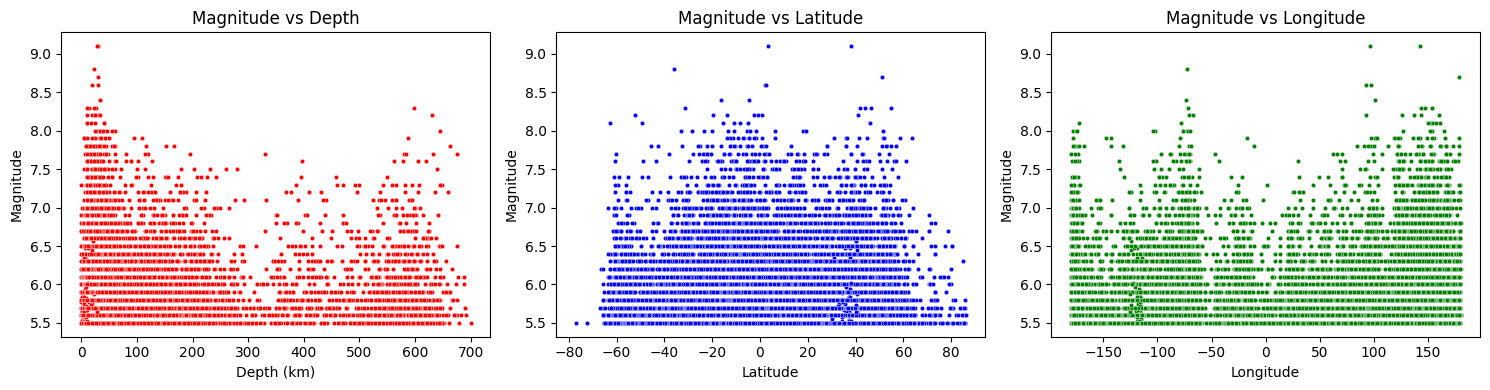

In [ ]:
plt.figure(figsize=(15, 4))

# Magnitude vs Depth
plt.subplot(1, 3, 1)
sns.scatterplot(x='Depth', y='Magnitude', data=df, color='red', s=10)
plt.title('Magnitude vs Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')

# Magnitude vs Latitude
plt.subplot(1, 3, 2)
sns.scatterplot(x='Latitude', y='Magnitude', data=df, color='blue', s=10)
plt.title('Magnitude vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Magnitude')

# Magnitude vs Longitude
plt.subplot(1, 3, 3)
sns.scatterplot(x='Longitude', y='Magnitude', data=df, color='green', s=10)
plt.title('Magnitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

Respecto a la distribución de magnitud de los sismos, podemos observar que es mayor cuando la profundidad es baja ($< 100$ km), y presenta otro peak alrededor de $600$ km bajo tierra. Por otro lado, en cuanto a la coordenada de longitud existe un comportamiento oscilante, dado que la magnitud aumenta en las longitudes extremas, y al acercarse al centro sube y baja sin un patrón claro. Con respecto a la latitud, pareciera que la magnitud aumenta hacia la latitud cero, disminuyendo hacia los polos.


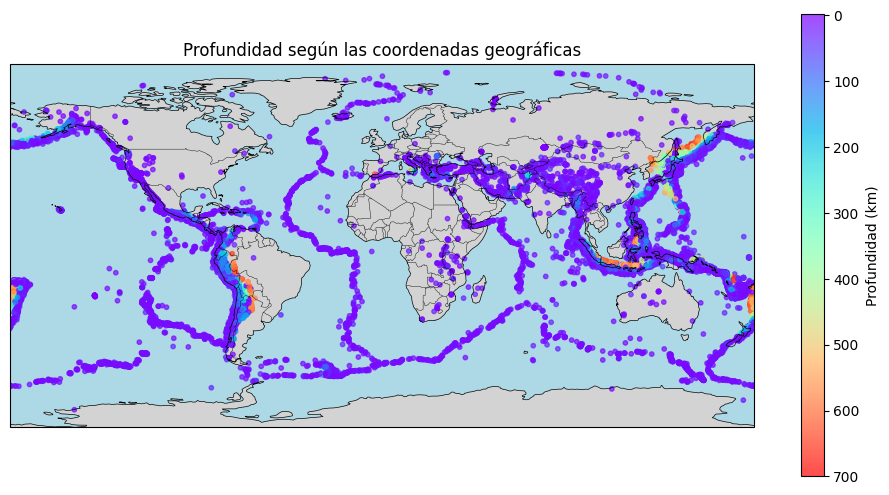

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))

# creamos una proyección del mapa del mundo
ax = plt.axes(projection=ccrs.PlateCarree())

# mapa base que incluye la tierra, el océano y los bordes de los continentes
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)

# scatter plot de los sismos, coloreandolos según su profundidad
sismos = ax.scatter( df['Longitude'], df['Latitude'], c=df['Depth'], cmap='rainbow', s=10, alpha=0.7, transform=ccrs.PlateCarree())
# colorbar
cbar = plt.colorbar(sismos , label='Profundidad (km)')
cbar.ax.invert_yaxis()

plt.title("Profundidad según las coordenadas geográficas")
plt.show()


De donde podemos notar que hay una notable profundidad en los sismos de acuerdo a su latitud y longitud, en latinoamérica y en el continente asiático, lo que podría ayudarnos al momento de predecir la magnitud de los sismos.

# **Pre-procesamiento de los datos**

### <u>Revisión de datos faltantes y duplicados:<u>

In [ ]:
#Revisamos los datos faltantes

print("Datos faltantes:")
data_faltante = df.isnull().sum()
data_faltante

Datos faltantes:


,0
Date,14211
Time,0
Latitude,0
Longitude,0
Type,0
Depth,0
Depth Error,18951
Depth Seismic Stations,16315
Magnitude,0
Magnitude Type,3


In [ ]:
# Filas donde 'Magnitude Type' es NaN
filas_faltantes = df[df['Magnitude Type'].isnull()]

# Mostrar esas filas
filas_faltantes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year
6703,NaT,13:36:00,40.3732,-124.9227,Earthquake,11.93,NaN,NaN,5.70,NaN,...,NaN,NaN,NaN,NaN,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic,NaN
7294,NaT,18:08:00,37.4600,-118.5900,Earthquake,9.00,NaN,NaN,5.82,NaN,...,NaN,NaN,NaN,NaN,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic,NaN
7919,NaT,11:55:00,37.4788,-121.6858,Earthquake,9.17,NaN,NaN,5.60,NaN,...,NaN,NaN,NaN,NaN,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic,NaN


In [ ]:
# Eliminamos las filas donde 'Magnitude Type' es NaN, ya que son sólo 3 valores, y no podemos saber en qué escala se encuentra ese valor de magnitud.
dff = df.dropna(subset=['Magnitude Type'])

# escala de magnitud que queremos eliminar
tipos_a_eliminar = ['ML', 'MH', 'MS', 'MB', 'MD']

# filtramos las filas de acuerdo a la escala
dff_filtrado = dff[~dff['Magnitude Type'].isin(tipos_a_eliminar)]


In [ ]:
#Revisamos si es que existen datos duplicados

df.duplicated().sum()

np.int64(0)

### No contamos con datos duplicados. Con respecto a los datos faltantes, que son sólo 3 en las columnas que utilizaremos, eliminamos aquellos que no contenían el tipo de escala de la magnitud, ya que no podemos saber en qué escala se encuentran.

# **MODELOS**

# <u>**Algoritmo 1: Regresión con Random Forest**<u>


En general, random forest es un algoritmo robusto que permite captar relaciones no lineales e interacciones que no sean evidentes al analizar relaciones líneales (Matriz de correlación en nuestro caso). Y frente a la poca relación que muestran las características, este modelo

In [ ]:
# Tomamos las columnas a usar
latitude, logitude, depth, magnitude = dff_filtrado['Latitude'], dff_filtrado['Longitude'], dff_filtrado['Depth'], dff_filtrado['Magnitude']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Agrupamos
X_dat = np.column_stack((latitude, logitude, depth))
y_dat = magnitude

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_ = train_test_split(
    X_dat, y_dat, test_size=0.2, random_state=42)

# Definimos el modelo
model_dat = RandomForestRegressor(n_estimators=100, random_state=42)

# Validación cruzada
k_folds = 5
mse_scores = cross_val_score(
    model_dat, X_train, y_train, cv=k_folds, scoring='neg_mean_squared_error')

# Ajustamos el modelo
model_dat.fit(X_train, y_train)
y_pred = model_dat.predict(X_test)

# Ahora las métricas
mse_scores = -mse_scores # MSE por fold
mean_mse = mse_scores.mean() # MSE promedio

rmse_scores = np.sqrt(mse_scores) # RMSE por fold
mean_rmse = rmse_scores.mean() # RMSE promedio

print(f'MSE por fold: {mse_scores}')
print(f'MSE promedio: {mean_mse}')
print(f'RMSE por fold: {rmse_scores}')
print(f'RMSE promedio: {mean_rmse}')




MSE por fold: [0.2077515  0.21657987 0.21373085 0.20283386 0.20688796]
MSE promedio: 0.20955681002373394
RMSE por fold: [0.45579765 0.46538143 0.46231034 0.4503708  0.45484939]
RMSE promedio: 0.4577419223238718


# Optimización de Hiperparametros

Mediante un Gridsearch, vamos a intentar buscar hiperparametros que se ajusten mejor a los datos esperando que mejoren las métricas.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [100], # Número de árboles
    'max_depth': [None, 10], # Profundidad máxima de los árboles
    'min_samples_split': [2, 5], # Mínimo de muestras para hacer split
    'min_samples_leaf': [1, 2], # Mínimo de muestras en una hoja después de un split
    'bootstrap': [True]
}

# Gridsearch para optimizar los parametros
grid_search = GridSearchCV(
    rf, # Modelo
    param_grid=param_grid, # Parametros del Grid
    cv=3, # Cantdiad de Folds
    n_jobs=-1, # Procesadores a usar
    verbose=2, # Información
    scoring='neg_mean_squared_error' # MSE para regresión
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Entrenamos el nuevo modeloco
model_grid = RandomForestRegressor(max_depth=10,
                                    min_samples_leaf= 2,
                                    min_samples_split=5,
                                    n_estimators=100,
                                    random_state=42
                                    )

# Validación cruzada 2
mse_scores2 = cross_val_score(
    model_grid, X_train, y_train, cv=k_folds, scoring='neg_mean_squared_error')

# Ajustamos el modelo
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)

# Ahora las métricas
mse_scores2 = -mse_scores2 # MSE por fold
mean_mse2 = mse_scores2.mean() # MSE promedio

rmse_scores2 = np.sqrt(mse_scores2) # RMSE por fold
mean_rmse2 = rmse_scores2.mean() # RMSE promedio

print(f'MSE por fold: {mse_scores2}')
print(f'MSE promedio: {mean_mse2}')
print(f'RMSE por fold: {rmse_scores2}')
print(f'RMSE promedio: {mean_rmse2}')


MSE por fold: [0.18762617 0.19210912 0.18938765 0.17822054 0.18418494]
MSE promedio: 0.18630568357363358
RMSE por fold: [0.43315836 0.43830254 0.43518692 0.42216175 0.42916773]
RMSE promedio: 0.4315954594077354


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

y = y_dat  # Magnitudes

# Baseline
y_mean = np.full_like(y, fill_value=np.mean(y), dtype=float)
rmse_baseline = np.sqrt(mean_squared_error(y, y_mean))
print("RMSE baseline:", rmse_baseline)

# R^2 en CV
r2_scores = cross_val_score(model_grid, X_dat, y, cv=5, scoring='r2')
print("R2 por fold:", r2_scores)
print("R2 promedio:", np.mean(r2_scores))


RMSE baseline: 0.4373173448481637
R2 por fold: [-0.04716336  0.03711519  0.03928967  0.04028832  0.01816562]
R2 promedio: 0.017539090843117045


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_scores = -cross_val_score(model_grid, X_dat, y, cv=5,
                              scoring='neg_mean_absolute_error')
print("MAE promedio:", mae_scores.mean())


MAE promedio: 0.3207054565600101


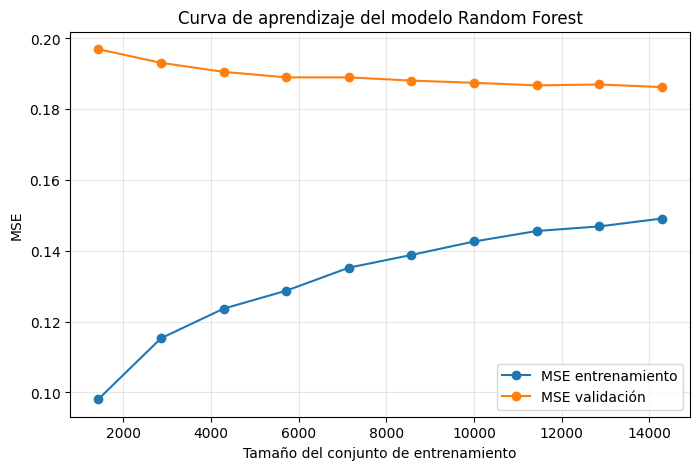

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
model_a = model_grid

train_sizes, train_scores, val_scores = learning_curve(
    model_a,
    X_dat, y_dat,
    cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mse = -np.mean(train_scores, axis=1)
val_mse = -np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mse, 'o-', label="MSE entrenamiento")
plt.plot(train_sizes, val_mse, 'o-', label="MSE validación")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje del modelo Random Forest")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

La curva de aprendizaje no es nada prometedora, el ajuste del modelo aún optimizando parámetros es con creces deficiente. El modelo no tiene realmente por que ser el problema, pues ya notamos que los datos que escogimos no tienen una relación líneal inexistente, y con esto encontramos que el random forest no está encontrando ninguna relación no líneal o relación de características que estemos pasando por alto.

La curva de aprendizaje nos está diciendo que si bien el error de validación disminuye, al aumentar el conjunto de entrenamiento, el error de aprendizaje crece. O sea que estamos teniendo un claro sobreajuste, aunque leve y no parece que vaya a mejorar al añadir más datos de entrenamiento.



## RF vs Lasso (Por curiosidad)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lasso_model  = make_pipeline(StandardScaler(), Lasso(alpha=0.001))

models = {
    "Random Forest": model_grid,
    "Lasso": lasso_model
}



for name, model in models.items():
    # Validación cruzada solo con los datos de entrenamiento
    mse_scores = cross_val_score(
        model, X_train, y_train,
        cv=k_folds,
        scoring='neg_mean_squared_error'
    )

    mse_scores = -mse_scores                # MSE por fold
    mean_mse = mse_scores.mean()            # MSE promedio
    rmse_scores = np.sqrt(mse_scores)       # RMSE por fold
    mean_rmse = rmse_scores.mean()          # RMSE promedio

    print(f'=== {name} ===')
    print(f'MSE por fold: {mse_scores}')
    print(f'MSE promedio: {mean_mse}')
    print(f'RMSE por fold: {rmse_scores}')
    print(f'RMSE promedio: {mean_rmse}\n')



=== Random Forest ===
MSE por fold: [0.18762617 0.19210912 0.18938765 0.17822054 0.18418494]
MSE promedio: 0.18630568357363358
RMSE por fold: [0.43315836 0.43830254 0.43518692 0.42216175 0.42916773]
RMSE promedio: 0.4315954594077354

=== Lasso ===
MSE por fold: [0.19236232 0.19945731 0.19669878 0.18356852 0.18938374]
MSE promedio: 0.1922941341409071
RMSE por fold: [0.43859129 0.44660644 0.44350736 0.42844897 0.43518242]
RMSE promedio: 0.43846729639968307



Lasso prodía haber sido un mejor candidato que random forest

# <u>**Algoritmo 2: KNN**<u>

Podemos asumir que los sismos que ocurren en condiciones similares tienden a presentar magnitudes parecidas. Por ejemplo, si dos eventos sísmicos se registran en zonas geográficas cercanas o a profundidades similares, es razonable esperar que sus magnitudes sean parecidas. Por lo que se eligió el modelo KNN para predecir la magnitud basándose en los sismos más cercanos en términos de profundidad, latitud y longitud.

Dado que KNN es un modelo especialmente sensible a la escala de las variables ya que depende directamente del cálculo de distancias, se comparó el modelo escalado y sin escalar. Esto nos va a permitir analizar cómo afecta la normalización a la calidad de las predicciones y determinar si el escalado aporta mejoras significativas en este conjunto de datos.


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

knn_model_escalado = Pipeline([("scaler", StandardScaler()),("knn", KNeighborsRegressor())]) #modelo escalado
knn_model_sin = KNeighborsRegressor()# modelo sin escalar

In [43]:
#Validacion cruzada para el modelo escalado y no escalado
k_folds = 5

mse_scores_knn_escalado = cross_val_score(
    knn_model_escalado, X_train, y_train,
    cv=k_folds,
    scoring='neg_mean_squared_error'
)
k_folds = 5

mse_scores_knn_sin = cross_val_score(
    knn_model_sin, X_train, y_train,
    cv=k_folds,
    scoring='neg_mean_squared_error'
)

In [44]:
# nos aseguramos que efectivamente se haya escalado
knn_model_escalado


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [45]:
#nos aseguramos que el modelo este sin escalar
knn_model_sin

KNeighborsRegressor()

In [46]:
#Evaluamos el modelos con las metricas
mse_scores_knn_escalado = -mse_scores_knn_escalado
rmse_scores_knn_escalado = np.sqrt(mse_scores_knn_escalado)

mse_scores_knn_sin = -mse_scores_knn_sin
rmse_scores_knn_sin = np.sqrt(mse_scores_knn_sin)

print("MSE por fold del escalado:", mse_scores_knn_escalado)
print("MSE promedio del escalado:", mse_scores_knn_escalado.mean())
print("RMSE por fold del escalado:", rmse_scores_knn_escalado)
print("RMSE promedio del escalado:", rmse_scores_knn_escalado.mean())

print("MSE por fold sin escalar:", mse_scores_knn_sin)
print("MSE promedio sin escalar:", mse_scores_knn_sin.mean())
print("RMSE por fold sin escalar:", rmse_scores_knn_sin)
print("RMSE promedio sin escalar:", rmse_scores_knn_sin.mean())

print("Dif por fold:", mse_scores_knn_escalado - mse_scores_knn_sin)

MSE por fold del escalado: [0.21505066 0.22082174 0.21437362 0.20603955 0.2126513 ]
MSE promedio del escalado: 0.213787373702541
RMSE por fold del escalado: [0.46373555 0.46991673 0.46300498 0.4539158  0.46114131]
RMSE promedio del escalado: 0.4623428744759166
MSE por fold sin escalar: [0.21979842 0.21863199 0.21583815 0.20735019 0.213336  ]
MSE promedio sin escalar: 0.21499094949818173
RMSE por fold sin escalar: [0.46882664 0.467581   0.46458385 0.45535721 0.4618831 ]
RMSE promedio sin escalar: 0.4636463593774849
Dif por fold: [-0.00474776  0.00218974 -0.00146453 -0.00131064 -0.00068469]


Vemos que la diferencia entre MSEs no es mucha por lo que se usara el modelo escalado.

In [47]:
#Ajustamos el modelo
knn_model_escalado.fit(X_train, y_train)
y_pred_knn2 = knn_model_escalado.predict(X_test)

Para evaluar el modelo de distintas perspectivas usamos distintas métricas

In [48]:
#Error absoluto medio
from sklearn.metrics import mean_absolute_error
mae_knn = -cross_val_score(
    knn_model_escalado, X_dat, y_dat, cv=5,
    scoring='neg_mean_absolute_error'
)

print("MAE promedio:", mae_knn.mean())


MAE promedio: 0.341162663680896


El error absoluto medio nos indica cuánto se equivoca el modelo en promedio al predecir la magnitud por lo que vemos que 0,328 es un valor razonable de error


In [49]:
#Coeficiente de determinación
r2_scores_knn = cross_val_score(
    knn_model_escalado, X_dat, y_dat,
    cv=5, scoring='r2'
)

print("R2 por fold:", r2_scores_knn)
print("R2 promedio:", np.mean(r2_scores_knn))

R2 por fold: [-0.20786168 -0.10752375 -0.07171925 -0.1321862  -0.11771397]
R2 promedio: -0.12740097044305881


El coeficiente de determinación mide qué tan bien un modelo explica la variabilidad de los datos reales. Su valor ideal es cercano a 1, lo que indica un buen ajuste. En nuestro caso, se obtuvo -0.118, lo que significa que el modelo no solo no explica adecuadamente los datos, sino que tiene un desempeño peor que un modelo trivial que simplemente predice la media. Esto sugiere que el modelo actual no está capturando la relación entre las variables de entrada y la magnitud sísmica.

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
param_grid_knn = {
    "knn__n_neighbors": [3, 5, 7, 9, 11],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]  # Manhattan y Euclidiana
}

# Gridsearch para optimizar los parametros
grid_knn = GridSearchCV(
    knn_model_escalado,
    param_grid_knn,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'}


Vemos que el modelo obtiene su mejor desempeño cuando utiliza 11 vecinos más cercanos para hacer la predicción, también p=1 nos indica que el modelo prefiere usar la distancia Manhattan y finalmente weights = 'uniform' nos indica que todos los vecinos pesan lo mismo por lo que no se podría mejorar el modelo utilizando pesos basados en las distancias.

In [51]:
#Entrenamos el modelo con los mejores parametros
best_knn = grid_knn.best_estimator_

mse_scores_knn2 = -cross_val_score(
    best_knn, X_train, y_train, cv=5,
    scoring='neg_mean_squared_error'
)
rmse_scores_knn2 = np.sqrt(mse_scores_knn2)

mae_scores_knn22 = -cross_val_score(
    best_knn, X_dat, y_dat,
    cv=5,
    scoring='neg_mean_absolute_error'
)

r2_scores_knn2 = cross_val_score(
    best_knn, X_dat, y_dat,
    cv=5,
    scoring='r2'
)

print("MSE promedio (KNN optimizado):", mse_scores_knn2.mean())
print("RMSE promedio (KNN optimizado):", rmse_scores_knn2.mean())

print("MAE por fold (KNN optimizado):", mae_scores_knn22)
print("MAE promedio (KNN optimizado):", mae_scores_knn22.mean())

print("R2 por fold (KNN optimizado):", r2_scores_knn2)
print("R2 promedio (KNN optimizado):", r2_scores_knn2.mean())

MSE promedio (KNN optimizado): 0.19598545020669828
RMSE promedio (KNN optimizado): 0.44267641176609773
MAE por fold (KNN optimizado): [0.341229   0.31525756 0.31801766 0.32156081 0.3395242 ]
MAE promedio (KNN optimizado): 0.327117845541241
R2 por fold (KNN optimizado): [-0.09561873 -0.00520065  0.00911755 -0.03838244 -0.02290261]
R2 promedio (KNN optimizado): -0.03059737594687819


Luego de ajustar los hiper parámetros y volver a evaluar todas las métricas, observamos que el modelo KNN mejoró. Sin embargo, sigue siendo un muy mal modelo que no logra predecir la magnitud del sismo y lo podemos ver específicamente en el coeficiente de determinación que nos da negativo.

El motivo de este mal desempeño se debe principalmente a que la magnitud del sismo no depende directamente de la latitud, la longitud o la profundidad. La magnitud es un resultado de distintos procesos físicos, los cuales tienen naturaleza no lineal y aleatoria. Dos sismos que ocurren muy cerca, o incluso a la misma profundidad, pueden tener magnitudes completamente distintas porque la energía liberada depende de factores internos como el material de la corteza, como el tamaño de la ruptura, las tensiones acumuladas, el tipo de falla o las condiciones geológicas, factores que no están presentes en el dataset.

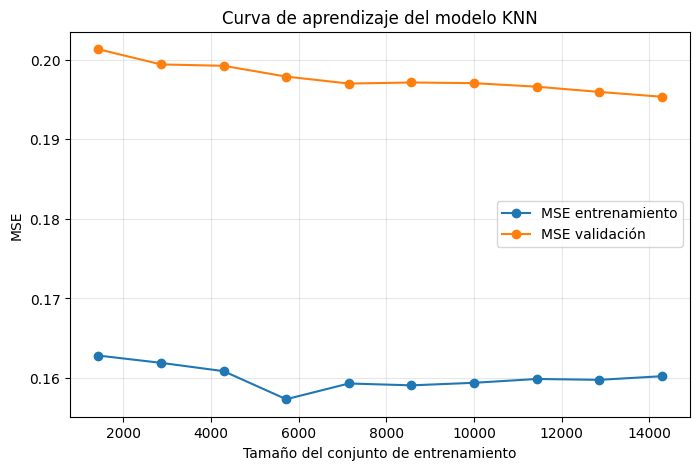

In [52]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
model = best_knn

train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_dat, y_dat,
    cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mse = -np.mean(train_scores, axis=1)
val_mse = -np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mse, 'o-', label="MSE entrenamiento")
plt.plot(train_sizes, val_mse, 'o-', label="MSE validación")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje del modelo KNN")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


La curva de aprendizaje confirma lo observado en las métricas: el modelo presenta un desempeño deficiente. La curva muestra que tanto el error de entrenamiento como el de validación permanecen altos aun cuando se incrementa el tamaño del conjunto de entrenamiento. Además, la brecha entre ambas curvas es pequeña y estable, lo que indica que el modelo no presenta problemas de varianza, sino de sesgo. Esto confirma que el modelo KNN está sub ajustando los datos y que aumentar la cantidad de información no mejora significativamente su desempeño. Por lo tanto, la magnitud sísmica no puede modelarse adecuadamente a partir de la latitud, longitud y profundidad.


# **Conclusiones**

Como ya analizamos en ambos algoritmos de regresión, los modelos se desenvuelven deficientemente. Esto no es precisamente culpa del modelo, sino del problema que planteamos en un principio, teniendo latitud, longitud y profundidad, los modelos no tienen suficiente información para predecir la magnitud.

Haciendo una comparativa entre las curvas de aprendizaje y resultados entre modelos, el desempeño deficiente es equivalente entre algoritmos, con el de kNN mostrando menor separación entre validación y entrenamiento, además de no saturarse tan notablemente como la de RandomForest. Entonces podríamos decir que el trade-off de bias y varianza de kNN es mejor y que el modelo generaliza "mejor" que el RandomForest, teniendo en cuenta su deficiencia.
